# Preprocessing Techniques
* Data Preprocessing is a technique that is used to convert the raw data into a clean data set

### Data preprocessing steps

* loading data (reading files)
* exploring data (summarizing,statastics..ect)
* cleaning data  ( handling missing data)
* Transforming data ( Scaling, feature engineering etc)

    * will learn data preprocessing techniques with scikit-learn, one of the most popular frameworks used for industry data science
    * The scikit-learn library includes tools for data preprocessing and data mining. It is imported in Python via the statement import sklearn.

![ddd.PNG](ddd.PNG)

### Data Imputation 
* if the dataset is missing too many values, we just don't use it
*  if only a few of the values are missing, we can perform data imputation to substitute the missing data with some other value(s).
* There are many different methods for data imputation
    * Using the mean value
    * Using the median value
    * Using the most frequent value
    * Filling in missing values with a constant
    
**ex: Sem exams and electric bills **


## Feature Scaling

### 1.Standardizing Data

                   

* Data scientists will convert the data into a standard format to make it easier to understand.
* The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1), and the process of    converting data into this format is called data standardization.
* improve the performance of models
* it rescales the data to have mean = 0 and varience(statistical measure that provides indicator of data's dispresion) = 1

* Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.
* The formula for this is:  (𝑥 − 𝜇)/𝜎

    * We subtract the mean (𝜇) from each value (x) and then divide by the standard deviation (𝜎)
    
![stddata.PNG](std.PNG)

![std.PNG](stdd.PNG)

    
### 2. Data Range

* Scale data by compressing it into a fixed range
* One of the biggest use cases for this is compressing data into the range [0, 1]
* MinMaxScaler 
![minmax.PNG](minmax.PNG)

### 3. Normalizing Data

* Want to scale the individual data observations (i.e. rows)
* Used in classification Problems and data mining 
* when clustering data we need to apply L2 normalization to each row
* L2 normalization applied to a particular row of a data array 
* L2 norm of a row is just the square root of the sum of squared values for the row
![normal.PNG](normal.PNG)


### 4. Robust Scaling
* Deal with is outliers (data point that is significantly further away from the other data points)
* Robustly scale the data, i.e. avoid being affected by outliers
* Scaling by using data's median and Interquartile Range (IQR)
* Here mean affected but median remains same
* Subtract the median from each data value then scale to the IQR



## Scaling ?

200km,20km,25km,1000m,100cm,10mm --- raw data

200+20+25+100+100+10

same unit -- km
sum()-- 

rescaling data 

# Data Imputation

In [6]:
import pandas as pd
import numpy as np

di = {
    "Name" : pd.Series(["Sai","Goutham","akash","Lavanya","swetha"],index = [1,2,3,4,6]),
    "C": pd.Series([55,56,78,67],index = [2,3,4,5]),
    "Python": pd.Series([56,78,98,100,98],index= [1,3,4,5,6]),
    "Data_Analysis": pd.Series ([34,67,5,34],index = [1,2,3,4])
}

df = pd.DataFrame(di)
df

,Name,C,Python,Data_Analysis
1,Sai,NaN,56.0,34.0
2,Goutham,55.0,NaN,67.0
3,akash,56.0,78.0,5.0
4,Lavanya,78.0,98.0,34.0
5,NaN,67.0,100.0,NaN
6,swetha,NaN,98.0,NaN


In [7]:
df.duplicated()

1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [8]:
df["Data_Analysis"].duplicated()

1    False
2    False
3    False
4     True
5    False
6     True
Name: Data_Analysis, dtype: bool

In [13]:
# droping unwanted data/ record
df.drop([5],inplace = True)

In [14]:
df

,Name,C,Python,Data_Analysis
1,Sai,NaN,56.0,34.0
2,Goutham,55.0,NaN,67.0
3,akash,56.0,78.0,5.0
4,Lavanya,78.0,98.0,34.0
6,swetha,NaN,98.0,NaN


In [10]:
from sklearn.impute import SimpleImputer

In [18]:
si = SimpleImputer(strategy= "most_frequent")

In [19]:
si.fit_transform(df)

array([['Sai', 55.0, 56.0, 34.0],
       ['Goutham', 55.0, 98.0, 67.0],
       ['akash', 56.0, 78.0, 5.0],
       ['Lavanya', 78.0, 98.0, 34.0],
       ['swetha', 55.0, 98.0, 34.0]], dtype=object)

In [20]:
si.fit(df)

SimpleImputer(strategy='most_frequent')

In [21]:
si.transform(df)

array([['Sai', 55.0, 56.0, 34.0],
       ['Goutham', 55.0, 98.0, 67.0],
       ['akash', 56.0, 78.0, 5.0],
       ['Lavanya', 78.0, 98.0, 34.0],
       ['swetha', 55.0, 98.0, 34.0]], dtype=object)

In [22]:
si = SimpleImputer(strategy= "mean")

In [25]:
si.fit_transform(df[["C"]])

array([[63.],
       [55.],
       [56.],
       [78.],
       [63.]])

In [27]:
df["C"]

1     NaN
2    55.0
3    56.0
4    78.0
6     NaN
Name: C, dtype: float64

In [34]:
si = SimpleImputer(strategy="median")

In [35]:
si.fit_transform(df[["Python"]])

array([[56.],
       [88.],
       [78.],
       [98.],
       [98.]])

In [37]:
si = SimpleImputer(strategy="constant", fill_value=-1)
si.fit_transform(df)

array([['Sai', -1, 56.0, 34.0],
       ['Goutham', 55.0, -1, 67.0],
       ['akash', 56.0, 78.0, 5.0],
       ['Lavanya', 78.0, 98.0, 34.0],
       ['swetha', -1, 98.0, -1]], dtype=object)

# Standardizing Data


In [39]:
adv = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysis_GVP/main/Day2_29Jan/Datasets/Advertising.csv")
adv

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
adv.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [41]:
adv.std()

TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64

In [44]:
# xi - mean(x)  / std(x)
# 230.1
(adv["TV"][0] - np.mean(adv["TV"]) ) / np.std(adv["TV"])

0.969852266431447

In [45]:
from sklearn.preprocessing import scale

In [46]:
420*4

1680

In [48]:
sc = scale(adv)

In [49]:
sc

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [51]:
sc_data = pd.DataFrame(sc, columns = adv.columns)
sc_data

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [56]:
sc_data.mean().round(2)
# 147
# 0

TV           0.0
radio       -0.0
newspaper    0.0
sales       -0.0
dtype: float64

In [54]:
sc_data.std()
# 85
# 1

TV           1.002509
radio        1.002509
newspaper    1.002509
sales        1.002509
dtype: float64

In [57]:
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


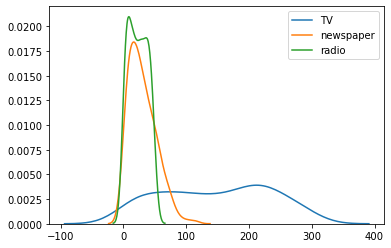

In [59]:
sns.kdeplot(adv["TV"])
sns.kdeplot(adv["newspaper"])
sns.kdeplot(adv["radio"])

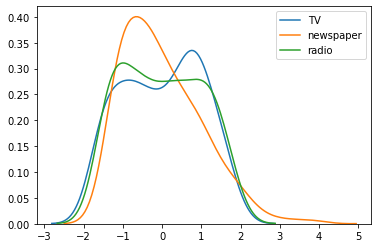

In [60]:
sns.kdeplot(sc_data["TV"])
sns.kdeplot(sc_data["newspaper"])
sns.kdeplot(sc_data["radio"])

# Data Range

In [61]:
home = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysis_GVP/main/Day2_29Jan/Datasets/HomeBuyer.csv")
home

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [62]:
home.min()

Age                   18
EstimatedSalary    15000
Purchased              0
dtype: int64

In [63]:
home.max()

Age                    60
EstimatedSalary    150000
Purchased               1
dtype: int64

fixed range [0- 1]

In [64]:
home["EstimatedSalary"][0]

19000

In [65]:
# (X - Xmin )/ (Xmax - Xmin)
(home["EstimatedSalary"][0] - home["EstimatedSalary"].min()) / (home["EstimatedSalary"].max() - home["EstimatedSalary"].min())

0.02962962962962963

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
mnscl = MinMaxScaler()

In [69]:
mnscl = mnscl.fit_transform(home)

In [70]:
mnscl_data = pd.DataFrame(mnscl, columns = home.columns)
mnscl_data

,Age,EstimatedSalary,Purchased
0,0.023810,0.029630,0.0
1,0.404762,0.037037,0.0
2,0.190476,0.207407,0.0
3,0.214286,0.311111,0.0
4,0.023810,0.451852,0.0
...,...,...,...
395,0.666667,0.192593,1.0
396,0.785714,0.059259,1.0
397,0.761905,0.037037,1.0
398,0.428571,0.133333,0.0


In [71]:
mnscl_data.min()

Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [72]:
mnscl_data.max()

Age                1.0
EstimatedSalary    1.0
Purchased          1.0
dtype: float64

# Normalizing Data

In [74]:
adv

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [75]:
from sklearn.preprocessing import Normalizer

In [76]:
norm = Normalizer()

In [79]:
norm = norm.fit_transform(adv)

In [80]:
norm_data = pd.DataFrame(norm, columns = adv.columns)
norm_data

,TV,radio,newspaper,sales
0,0.942116,0.154767,0.283331,0.090486
1,0.591135,0.522059,0.599106,0.138153
2,0.201426,0.537527,0.811561,0.108911
3,0.898632,0.244974,0.346997,0.109734
4,0.947881,0.056621,0.306174,0.067631
...,...,...,...,...
195,0.920781,0.089186,0.332638,0.183192
196,0.989807,0.051487,0.085111,0.101923
197,0.995383,0.052300,0.035991,0.071983
198,0.960250,0.142209,0.224149,0.086341


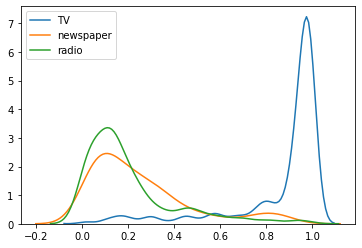

In [81]:
sns.kdeplot(norm_data["TV"])
sns.kdeplot(norm_data["newspaper"])
sns.kdeplot(norm_data["radio"])

# Robust Scaling

In [82]:
adv

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
rscl = RobustScaler()

In [85]:
rscl = rscl.fit_transform(adv)


In [89]:
rs = pd.DataFrame(rscl, columns = adv.columns)
rs

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594


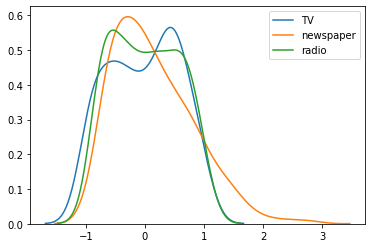

In [97]:
sns.kdeplot(rs["TV"])
sns.kdeplot(rs["newspaper"])
sns.kdeplot(rs["radio"])
# outliers

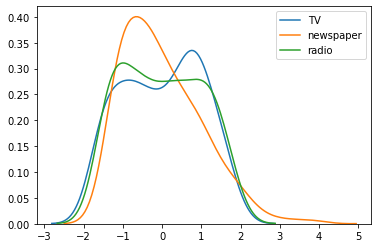

In [118]:
sns.kdeplot(sc_data["TV"])
sns.kdeplot(sc_data["newspaper"])
sns.kdeplot(sc_data["radio"])

# Label Encoder
 - covert categorical data into numerical data
 
 - sex - female & male ---- 0 & 1
 
* data
    * numerics
        * discete
        * continuous
     
* categorical
    * Nominal data 
        ---  without any quantitative value 
        --- name, locations, country, pain
        --- didn't fallows any order
    * ordinal data 
        --- it follows order
        --- ex: age - child, teenage, youth, old
        --- ex: very cool, cool, warm, hot, very hot, 
        --- ex: First class, Second class..

In [98]:
emp = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysis_GVP/main/Day2_29Jan/Datasets/employe.csv")
emp

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [99]:
emp.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [100]:
emp["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder

In [105]:
emp["Gender"] = emp[["Gender"]].fillna(method = "pad")

In [106]:
emp[["Gender"]].isnull().sum()

Gender    0
dtype: int64

In [102]:
le = LabelEncoder()

In [107]:
le.fit_transform(emp[["Gender"]])

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [108]:
pd.get_dummies(emp[["Gender"]])

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,0,1
998,0,1


In [109]:
emp["Team"].value_counts()

Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64

In [110]:
emp["Team"].isnull().sum()

43

# one Hot Encoder

- it apply  for nominal data


In [111]:


from sklearn.preprocessing import OneHotEncoder

In [113]:
ohe = OneHotEncoder()

In [114]:
ohe.fit_transform(k)

ValueError: Expected 2D array, got scalar array instead:
array=hello dear.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [117]:
pd.get_dummies(emp["Gender"])
 # male = 1
# female = 0


,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,0,1
998,0,1
